In [1]:
%matplotlib inline

In [2]:
# Criação do tipo de indivíduo e função de fitness
from deap import base, creator

creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

print(creator.Individual([1, 2]))

[1, 2]


In [3]:
# Função para criação de indivíduos
import random

def create_route(n_cities):
    route = list(range(n_cities))
    random.shuffle(route)
    return creator.Individual(route)

In [4]:
# Criação de população usando o toolbox
from deap import tools

def create_tsp_toolbox(n_cities):
    toolbox = base.Toolbox()
    toolbox.register('individual', create_route, n_cities)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)

    return toolbox

toolbox = create_tsp_toolbox(10)
toolbox.population(n=2)

[[3, 2, 7, 9, 1, 4, 8, 5, 6, 0], [9, 5, 3, 2, 4, 0, 6, 1, 8, 7]]

In [5]:
# Introduzindo a função de mutação
def create_tsp_toolbox(n_cities):
    toolbox = base.Toolbox()
    toolbox.register('individual', create_route, n_cities)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.1)
    
    return toolbox

In [6]:
# Adicionando a função de crossover
def one_point_crossover(city_a, city_b):
    def mate(c_a, c_b):    
        pos = random.randint(0, len(c_a))
        upper_half = c_a[pos:]
        offspring = [c for c in c_b if c not in upper_half]
        offspring.extend(upper_half)

        return creator.Individual(offspring)
    
    return (mate(city_a, city_b), mate(city_b, city_a))

def create_tsp_toolbox(n_cities):
    toolbox = base.Toolbox()
    toolbox.register('individual', create_route, n_cities)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.1)
    toolbox.register('mate', one_point_crossover)

    return toolbox

In [7]:
# Adicionando a função de fitness e de seleção
def distance(route, distances_matrix):
    distance_sum = 0
    for (city_a, city_b) in zip(route, route[1:]):
        distance_sum += distances_matrix[city_a][city_b]
    return (distance_sum,)

def create_tsp_toolbox(n_cities, distances_matrix):
    toolbox = base.Toolbox()
    toolbox.register('individual', create_route, n_cities)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.1)
    toolbox.register('mate', one_point_crossover)
    toolbox.register('evaluate', distance, distances_matrix=distances_matrix)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

In [8]:
import numpy
from deap import algorithms

def solve_tsp(graph, n_iters=10):
    n_vertices = len(graph)
    toolbox = create_tsp_toolbox(n_vertices, graph)
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_iters, stats=stats, halloffame=hof, verbose=True)
    return hof[0]

In [9]:
import numpy as np

def random_points(n_points, min_coord=None, max_coord=None):
    return np.random.randn(n_points, 2) * 100

In [10]:
import networkx as nx

def build_graph(vertices_positions):
    G = nx.Graph()
    for node in range(vertices_positions.shape[0]):
        G.add_node(node, pos=(points[node, 0], points[node, 1]))
    
    return G

def show_graph(graph):
    nx.draw(graph, nx.get_node_attributes(graph, 'pos'), node_size=50)

def add_solution_to_graph(graph, solution):
    G_with_solution = G.copy()
    G_with_solution.add_path(solution)
    G_with_solution.add_edge(solution[-1], solution[0])
    
    return G_with_solution

In [11]:
import itertools

def build_distances_matrix(vertices_positions):
    n_vertices = vertices_positions.shape[0]
    dists = np.zeros((n_vertices, n_vertices))
    
    for i1, i2 in itertools.combinations(range(n_vertices), 2):
        v1, v2 = vertices_positions[i1, :], vertices_positions[i2, :]
        dist = np.linalg.norm(v1 - v2)
        
        dists[i1][i2] = dist
        dists[i2][i1] = dist
    
    return dists

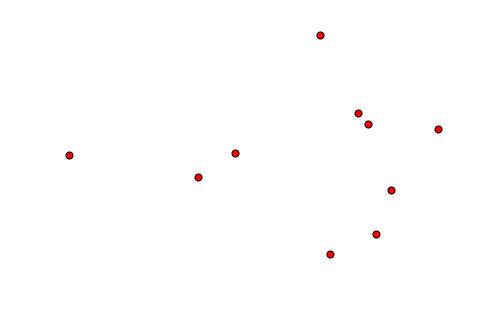

In [12]:
points = random_points(10)
dist_matrix = build_distances_matrix(points)
G = build_graph(points)
show_graph(G)

In [13]:
solution = solve_tsp(dist_matrix, n_iters = 100)

gen	nevals	avg    	min    	max   
0  	50    	1456.77	1029.04	1746.1
1  	36    	1335.92	985.298	1693.61
2  	35    	1224.34	936.575	1463.82
3  	24    	1131.12	936.575	1550.24
4  	34    	1097.95	773.951	1544.96
5  	32    	1030.34	871.414	1465.4 
6  	25    	981.563	870.229	1515.6 
7  	29    	958.94 	773.951	1743.87
8  	35    	903.436	870.229	1124.98
9  	36    	931.068	858.01 	1450.86
10 	29    	912.627	858.01 	1398.29
11 	29    	891.278	858.01 	1307.22
12 	35    	912.543	858.01 	1398.48
13 	35    	918.781	858.01 	1449.64
14 	37    	944.105	858.01 	1595.13
15 	26    	913.706	858.01 	1359.09
16 	26    	887.753	858.01 	1342.68
17 	34    	916.022	858.01 	1489.9 
18 	32    	914.812	858.01 	1563.14
19 	27    	875.991	858.01 	1350.4 
20 	30    	875.436	858.01 	1242.44
21 	30    	896.206	858.01 	1380.92
22 	40    	891.49 	858.01 	1537.53
23 	28    	911.971	858.01 	1457   
24 	30    	917.735	858.01 	1397.32
25 	27    	879.145	858.01 	1276.66
26 	35    	906.392	858.01 	1467.78
27 	24    	903.547	858

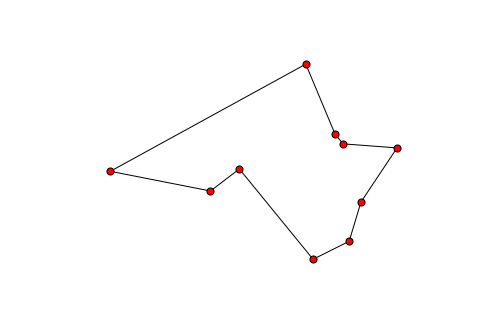

In [14]:
G_with_solution = add_solution_to_graph(G, solution)
show_graph(G_with_solution)